<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/3_1_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EC%8B%9C%ED%97%98%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataLoader

In [1]:
from skimage.transform import resize
from skimage import color
import random
import numpy as np 
from glob import glob
import os
from skimage import io
import matplotlib.pyplot as plt 

In [2]:
dir = '/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0313'
t_mylist = glob(os.path.join(dir, '*.jpg'))
mylist = t_mylist[0:10]
a =list(range(10))
print(a)
random.shuffle(a)
print(a) 
print(len(mylist))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 8, 7, 4, 9, 2, 6, 5, 0, 3]
10


In [3]:
def iteration(batch_size, mylist):
  N = len(mylist) #파일명이 적힌 경로를 담은 리스트의 길이를 잼
  inds = list(range(N)) #리스트의 길이만큼 숫자를 만들어줌 0~N-1만큼
  random.shuffle(inds) #리스트의 숫자를 뒤섞어줌
  print(f'inds : {inds}')
  for i in range(0,N, batch_size): #batch size 간격으로 반복할 예정
    print(f'i : {i}')
    #예를 들어 inds가 10개에 batch 사이즈 3이라면
    batch_inds = inds[i:min(i+batch_size,N)] #inds의 i부터 (i+batch사이즈에서 N중 최소값)까지 batch 사이즈만큼 간격으로 저장
    print(f'batch_inds : {batch_inds}')
    #batch_inds는 i = 0일떄 [0,1,2] i=1,2는 안됨, i=3일떄 [3,4,5], i=6일때 [6,7,8] i=9일때 [9] 가지고옴
    batch_img = np.zeros((len(batch_inds), 128, 128)) #batch_img에는 128,128,사이즈의 array를 배치개수만큼 만들어줌 
    print(f'batch_img shape : {batch_img.shape}')
    batch_myfile = []

    for bi in range(0, len(batch_inds)): # bi = range(0,3), range(0,3), range(0,3), range(0,1)됨 
      img = io.imread(mylist[batch_inds[bi]]) #mylist내의 파일을 읽어옴 
      
      if len(img.shape) == 3: #img가 2차원 array이 아닌 경우에는 
        print(f"img.shape : {img.shape}")
        print(f"resize(img[:,:,0] : {img[:,:,0].shape}")
        img = resize(img[:,:,0], (128,128))
        print(f'img : {img.shape}')
      else:
        img = resize(img, (128,128)) #128사이즈로 바꿔줌
      batch_img[bi] = img  #bi에는 index가 존재하므로 batch_img의 bi번째 애를 img파일로 지정 
      batch_myfile.append(mylist[batch_inds[bi]].split('/')[-1]) #이름만 쏙가지고옴

      yield batch_img, batch_myfile #마지막에 부려줌 

inds : [3, 4, 1, 0, 6, 5, 8, 7, 2, 9]
i : 0
batch_inds : [3, 4, 1]
batch_img shape : (3, 128, 128)
img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 1번쨰 step ###


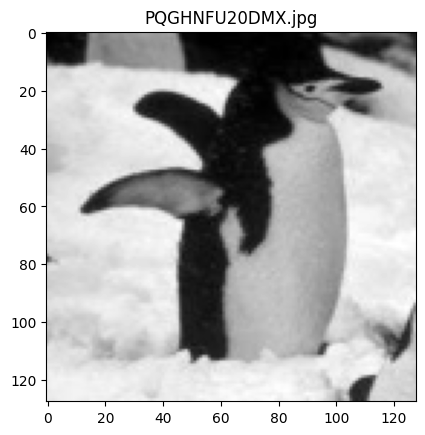

img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 2번쨰 step ###


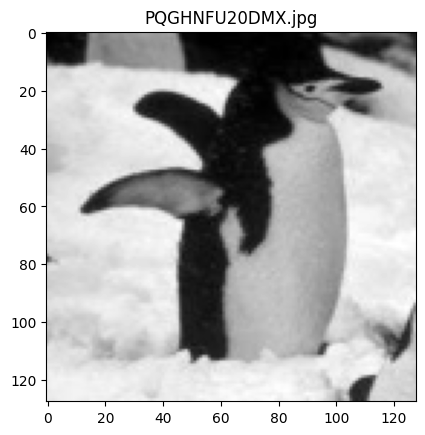

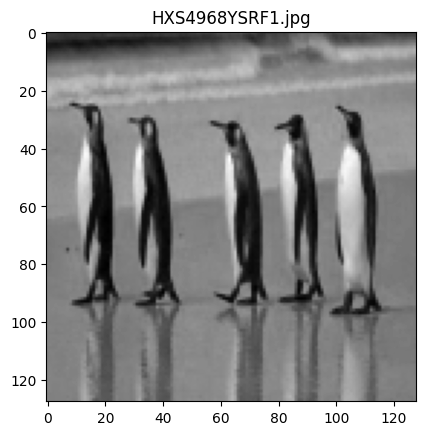

img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 3번쨰 step ###


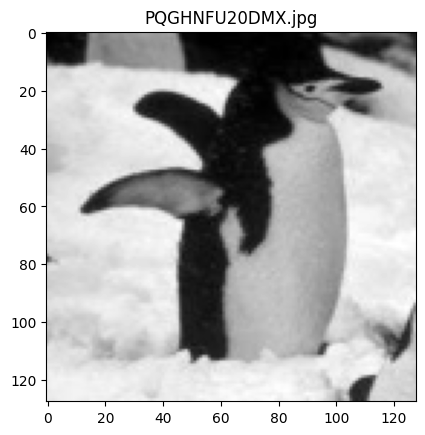

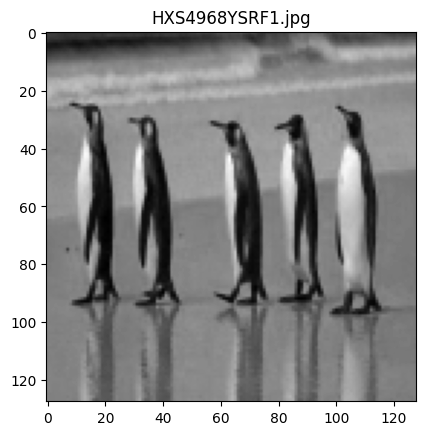

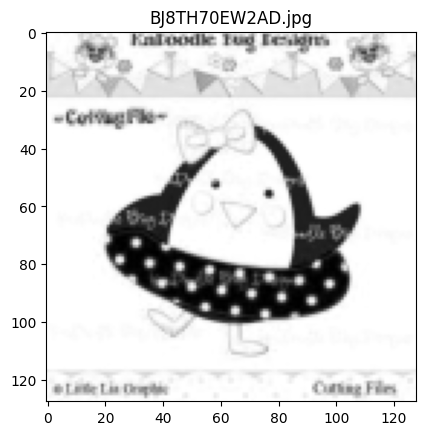

i : 3
batch_inds : [0, 6, 5]
batch_img shape : (3, 128, 128)
img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 4번쨰 step ###


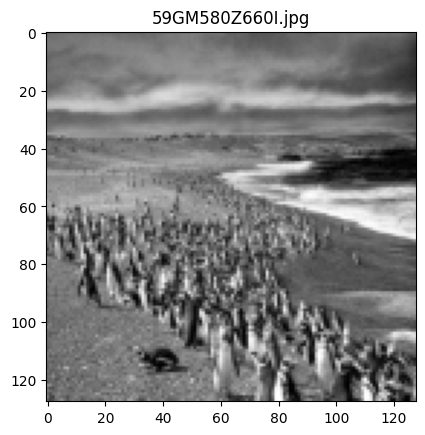

img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 5번쨰 step ###


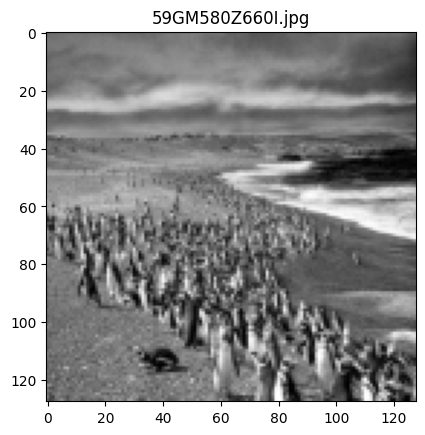

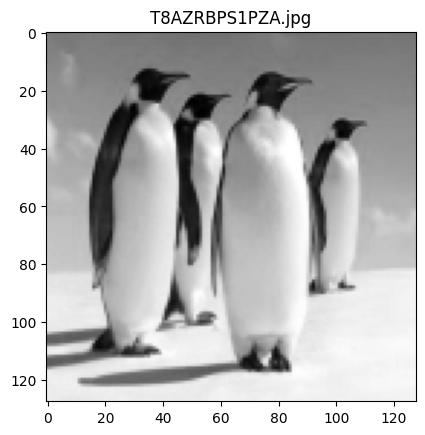

img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 6번쨰 step ###


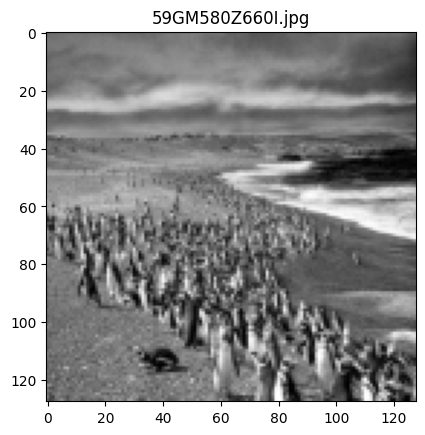

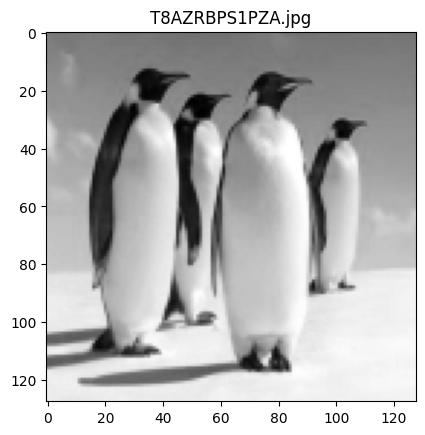

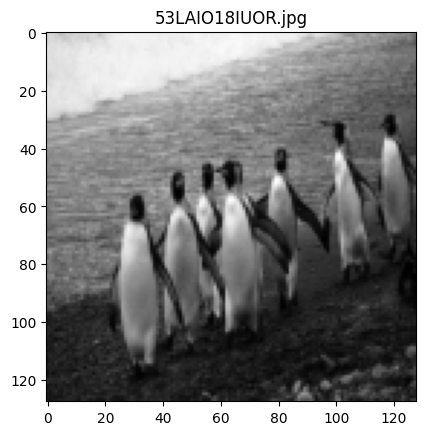

i : 6
batch_inds : [8, 7, 2]
batch_img shape : (3, 128, 128)
img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 7번쨰 step ###


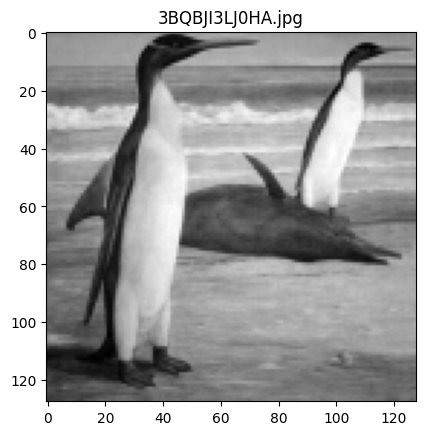

img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 8번쨰 step ###


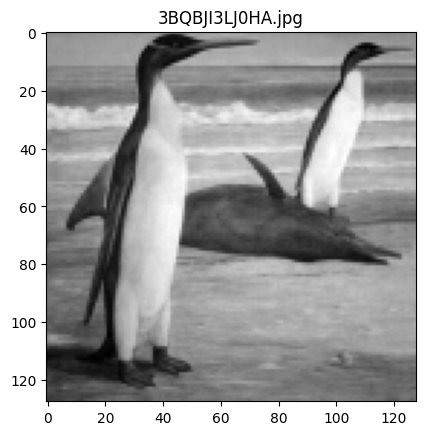

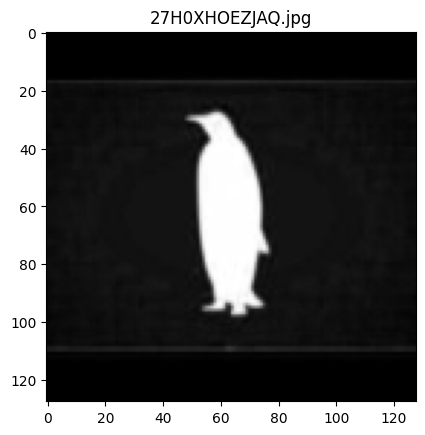

img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 9번쨰 step ###


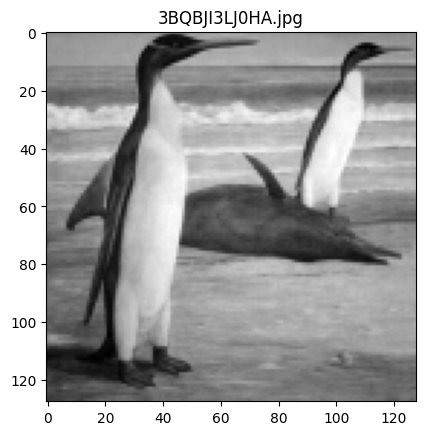

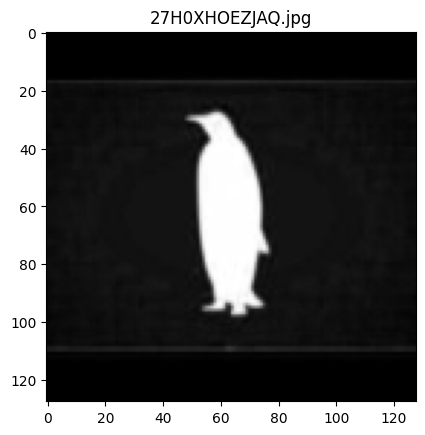

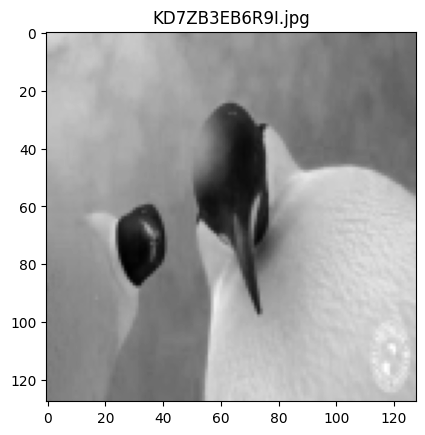

i : 9
batch_inds : [9]
batch_img shape : (1, 128, 128)
img.shape : (256, 256, 3)
resize(img[:,:,0] : (256, 256)
img : (128, 128)
### 10번쨰 step ###


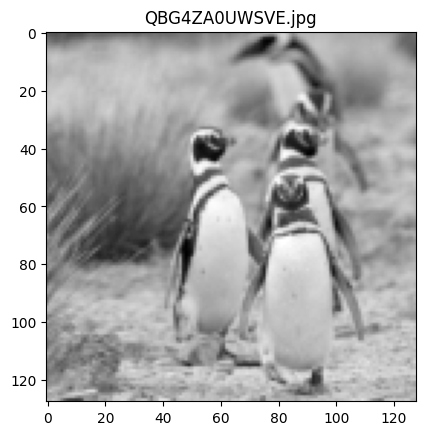

In [4]:
iteration = iteration(3, mylist)
cn = 0
for X,y in iteration:
  cn += 1
  print(f"### {cn}번쨰 step ###")
  for j in range(len(y)):
    plt.imshow(X[j],cmap='gray')
    plt.title(y[j])
    plt.show()

# Linear Regression 

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = torch.eye(3)
print(f"X.shape : {X.shape}") #3*3
w = torch.normal(0, 0.01, size=(3,1), requires_grad = True) 
print(f"w : {w}")
print(f"w.shape : {w.shape}")
#0과 0.01사이의 일반화된 숫자로 3*1사이즈로 갖다줌
b = torch.zeros(1, requires_grad = True) #파라미터를 업데이트 해야하므로 requires_grad = True를 해준다.
print(f"b : {b}")
print(f"b.shape : {b.shape}")

y = torch.tensor([1., 2, 3]) #label의 사이즈는 3
print(f"y : {y}")
print(f"y.shape : {y.shape}")

X.shape : torch.Size([3, 3])
w : tensor([[-0.0041],
        [-0.0191],
        [ 0.0051]], requires_grad=True)
w.shape : torch.Size([3, 1])
b : tensor([0.], requires_grad=True)
b.shape : torch.Size([1])
y : tensor([1., 2., 3.])
y.shape : torch.Size([3])


In [7]:
#linearRegression : y = Wx + b
def linereg(X,w, b): 
  return torch.matmul(X,w) + b #-> (3*3) * (3*1) -> (3*1)의 예측값사이즈가나옴

y_hat = linereg(X,w,b)
print(f"y_hat : {y_hat}")
print(f"y_hat.shape : {y_hat.shape}") # 1*3

y_hat : tensor([[-0.0041],
        [-0.0191],
        [ 0.0051]], grad_fn=<AddBackward0>)
y_hat.shape : torch.Size([3, 1])


In [8]:
#Mean Squared error  
# L(y_hat, y) = (1/2) * (y_hat-y)**2

#squared loss 
SL = (y_hat-y)**2
print(f"squared loss : (y_hat-y)**2 : {SL}")  #2차원텐서(3*1)과 1차원텐서(1*3)을 뺴면 3*3 -> 원하는 형태가 아님
print(f"SL.shape : {SL.shape}")
#MSE
MSE = (y_hat-y.reshape(y_hat.shape))**2/2 
print(f"y.reshape(y_hat.shape).shape : {y.reshape(y_hat.shape).shape}")
print(f"MSE Loss : (y_hat-y)**2 / 2 : {MSE}") #reshape를 꼭해줘야한다. 3*1 - 3*1 -> 3*1 
print(f"MSE Loss.shape : {MSE.shape}") 

def squared_loss(y_hat, y):
  return ((y_hat - y.reshape(y_hat.shape)) ** 2) / 2

print(f"squared-loss : {squared_loss(y_hat, y)}")

squared loss : (y_hat-y)**2 : tensor([[1.0082, 4.0164, 9.0246],
        [1.0386, 4.0769, 9.1152],
        [0.9898, 3.9795, 8.9692]], grad_fn=<PowBackward0>)
SL.shape : torch.Size([3, 3])
y.reshape(y_hat.shape).shape : torch.Size([3, 1])
MSE Loss : (y_hat-y)**2 / 2 : tensor([[0.5041],
        [2.0385],
        [4.4846]], grad_fn=<DivBackward0>)
MSE Loss.shape : torch.Size([3, 1])
squared-loss : tensor([[0.5041],
        [2.0385],
        [4.4846]], grad_fn=<DivBackward0>)


In [9]:
y = torch.tensor([1.,2,3]) # shape : 1*3
X = torch.eye(3) # shape : 3*3 
w = torch.tensor([1.,1,1], requires_grad = True) # shape : 3*1 
b = torch.zeros(1,requires_grad = True ) #shape : 1*1 

print('# initial parameters')
print(w,b)
print('# initial gradients: None')
print(w.grad, b.grad)

y_hat = linereg(X,w,b) #forward 
print(f"w,b : {w,b}")
print(f"w.grad, b.grad : {w.grad, b.grad}")  #아직 Gradinet계산안했으니 None
print(f"y_hat : {y_hat}") #add 백워드가 됨 

l = squared_loss(y_hat, y) #loss cal 
print(f"l : {l}")
print(f"l.shape : {l.shape}") #1*3

l.sum().backward() #gradient 계산 
print(f"l : {l.sum()}")

#gradient 계산한 것 확인하기
print(f" w.grad, b.grad : {w.grad, b.grad}")#w,b의 gradient가 생긴것을 확인할 수 있음

#파라미터 업데이트를 해보자
lr = 1
batch_size = 3
print(f"[w,b]: {[w,b]}") # 1. , 1, 1이다
print(f"[w,b]: {[w.grad,b.grad]}") #gradient만 계산되었고, 파라미터는 업데이트 아직안됨

#gradient를 업데이트 하시않기 위해 torch.no_grad()를 해준다. -> 역전파를 사용 x
with torch.no_grad():
  #파라미터 업데이트 SGD 공식 w* = w - lr* w.grad / batch_size
   #이거무조건 w -= 해줘야함 w = w - ~~~ 이렇게 해주면 파라미터.grad.zero() 사용불가
    w -= lr* w.grad / batch_size 
    b -= lr * b.grad / batch_size

  #파라미터를 각각 업데이트해주기 위해선 파라미터.grad.zero_() 를 사용해야함
    w.grad.zero_() #파라미터업데이트햇으니 gradient를 초기화해줌 
    b.grad.zero_() 
print([w,b]) #파라미터가 업데이트 된 것을 확인할 수 있다.
print([w.grad,b.grad]) # None, None 일것 


# initial parameters
tensor([1., 1., 1.], requires_grad=True) tensor([0.], requires_grad=True)
# initial gradients: None
None None
w,b : (tensor([1., 1., 1.], requires_grad=True), tensor([0.], requires_grad=True))
w.grad, b.grad : (None, None)
y_hat : tensor([1., 1., 1.], grad_fn=<AddBackward0>)
l : tensor([0.0000, 0.5000, 2.0000], grad_fn=<DivBackward0>)
l.shape : torch.Size([3])
l : 2.5
 w.grad, b.grad : (tensor([ 0., -1., -2.]), tensor([-3.]))
[w,b]: [tensor([1., 1., 1.], requires_grad=True), tensor([0.], requires_grad=True)]
[w,b]: [tensor([ 0., -1., -2.]), tensor([-3.])]
[tensor([1.0000, 1.3333, 1.6667], requires_grad=True), tensor([1.], requires_grad=True)]
[tensor([0., 0., 0.]), tensor([0.])]


In [10]:
#SGD 정의
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad/batch_size
      param.grad.zero_()
      

In [11]:
lr = 1
batch_size = 3

y = torch.tensor([1.,2,3]) # label (ground truth)
X = torch.eye(3)
w = torch.tensor([1.,1,1],requires_grad = True)
b = torch.zeros(1,requires_grad = True)

print('# initial parameters')
print(w,b)

# 1st iteration
y_hat = linereg(X,w,b)
print('\n')
print('## first prediction using initial parameters ##')
print(y_hat)

l = squared_loss(y_hat, y)
l.sum().backward()
sgd([w,b],lr,batch_size)
print('# updated parameters')
print(w, b)

# 2nd iteration
y_hat = linereg(X,w,b)
print('\n')
print('## second prediction using the updated parameters ##')
print(y_hat)

l = squared_loss(y_hat, y)
l.sum().backward()
sgd([w,b],lr,batch_size)
print('# updated parameters')
print(w, b)


# 3rd iteration
y_hat = linereg(X,w,b)
print('\n')
print('## third prediction using the updated parameters ##')
print(y_hat)

l = squared_loss(y_hat, y)
l.sum().backward()
sgd([w,b],lr,batch_size)
print('# updated parameters')
print(w, b)


# 4th iteration
y_hat = linereg(X,w,b)
print('\n')
print('## fourth prediction using the updated parameters ##')
print(y_hat)

l = squared_loss(y_hat, y)
l.sum().backward()
sgd([w,b],lr,batch_size)
print('# updated parameters')
print(w, b)

# initial parameters
tensor([1., 1., 1.], requires_grad=True) tensor([0.], requires_grad=True)


## first prediction using initial parameters ##
tensor([1., 1., 1.], grad_fn=<AddBackward0>)
# updated parameters
tensor([1.0000, 1.3333, 1.6667], requires_grad=True) tensor([1.], requires_grad=True)


## second prediction using the updated parameters ##
tensor([2.0000, 2.3333, 2.6667], grad_fn=<AddBackward0>)
# updated parameters
tensor([0.6667, 1.2222, 1.7778], requires_grad=True) tensor([0.6667], requires_grad=True)


## third prediction using the updated parameters ##
tensor([1.3333, 1.8889, 2.4444], grad_fn=<AddBackward0>)
# updated parameters
tensor([0.5556, 1.2593, 1.9630], requires_grad=True) tensor([0.7778], requires_grad=True)


## fourth prediction using the updated parameters ##
tensor([1.3333, 2.0370, 2.7407], grad_fn=<AddBackward0>)
# updated parameters
tensor([0.4444, 1.2469, 2.0494], requires_grad=True) tensor([0.7407], requires_grad=True)


# xls 데이터 - data load 및 Linear regression 해보기

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [22]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0327/data0327.xlsx')
X = torch.tensor(df.iloc[:,:-1].to_numpy()).to(torch.float32) #input
y = torch.tensor(df.iloc[:,-1].to_numpy()).to(torch.float32) #label

X_vd = X.clone()
y_vd = y.clone()
print(X.shape)
print(y.shape)


torch.Size([33, 4])
torch.Size([33])


In [28]:
#data loader
def loader(data, label, batch_size): 
  N, num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds) 
  for i in range(0, N, batch_size):
    batch_inds = inds[i: min(i+batch_size, N)]
    batch_data = data[batch_inds, :]
    batch_label = label[batch_inds]
    yield batch_data, batch_label
    

In [26]:
#모델, 목적함수, 알고리즘 정의
def linereg(X, w, b):
  return torch.matmul(X,w) + b
  
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size): 
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size 
      param.grad.zero_() 

In [29]:
##params
w = torch.tensor([1.,1,1,1.], requires_grad = True)
b = torch.tensor(1., requires_grad = True)
##hyper params
lr = 0.001
batch_size = 33


num_epcoh = 15
loss_valid_epoch = []
loss_valid_step = []

for j in np.arange(0, num_epcoh):
  mydata_iter = loader(X,y, batch_size)
  for batch_X, batch_y in mydata_iter:
    y_hat = linreg(batch_X, w, b) #1. forward
    l = squared_loss(y_hat, y) #2. loss calculation
    l.sum().backward() # 3. backward
    sgd([w,b], lr, batch_size) # 4. param update
    loss_valid_step.append(l.sum().detach()/ len(batch_X))

  #평가할떄는 backward와 param update 하지 않음
  y_vd_hat = linreg(X_vd, w, b) #1. forward
  l_all = squared_loss(y_vd_hat, y_vd) #2. loss calculation
  
  loss_valid_epoch.append(l_all.sum().detach() / len(X_vd))

  

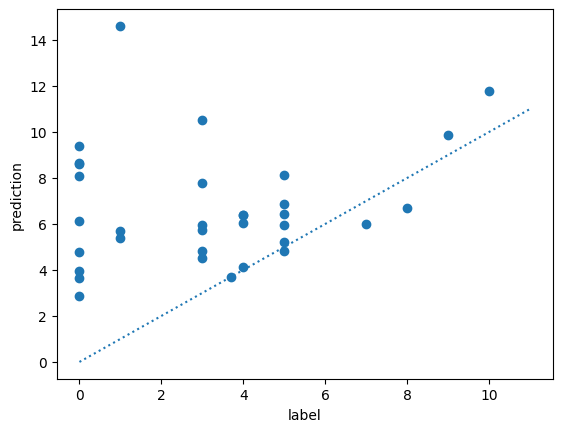

In [30]:
plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()
     


#MLP

In [32]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
d = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0327/data0327.xlsx')
X = torch.tensor(d.iloc[:,:-1].to_numpy()).to(torch.float32) # input
y = torch.tensor(d.iloc[:,-1].to_numpy()).to(torch.float32) # label
X_vd = X.clone() # 실제 학습에서는 X에 포함되지 않는 새로운 데이터를 넣자.
y_vd = y.clone()
print(X.shape)

torch.Size([33, 4])


In [40]:
def data_iter(data, label, batch_size):
  N, num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds)
  for i in range(0, N, batch_size):
    batch_inds = inds[i : min(i+batch_size , N)]
    batch_data =data[batch_inds, :]
    batch_label = label[batch_inds]
    yield batch_data, batch_label

#model : linear regression
model = nn.Sequential(
    nn.Linear(4, 400), #activation 함수없이 사용하면 Linear regression 모델과 같은 결과가 나온다.
    nn.Linear(400,1)
    
)
loss = nn.MSELoss(reduction = 'mean') #MSELOSS를 사용
alg = torch.optim.SGD(model.parameters(), lr = 0.00042, momentum = 0.9)

#training 
num_epoch = 50000
lr = 0.00042
batch_size = len(X)

loss_valid_step =[]
loss_valid_epoch = []
for j in np.arange(0, num_epoch):
  mydata_iter = data_iter(X, y, batch_size)
  for batch_X, batch_y in mydata_iter:
    y_hat = model(batch_X)
    l = loss(y_hat, batch_y.reshape(y_hat.shape))
    l.backward()
    alg.step() 
    alg.zero_grad() 
    loss_valid_step.append(l.detach())
    
  y_vd_hat = model(X_vd) #평가하므러 validation셋을 이용
  l_all = loss(y_vd_hat, y_vd)
  loss_valid_epoch.append(l_all.detach())


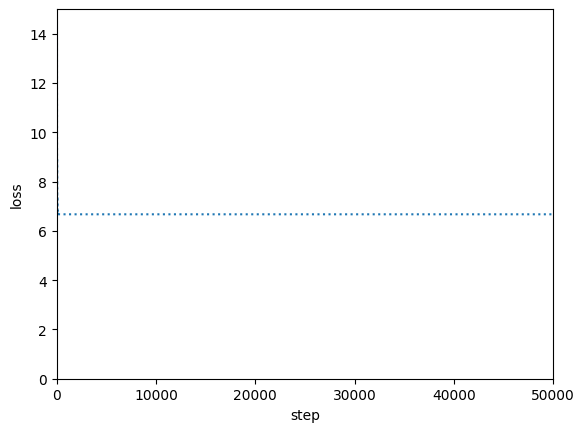

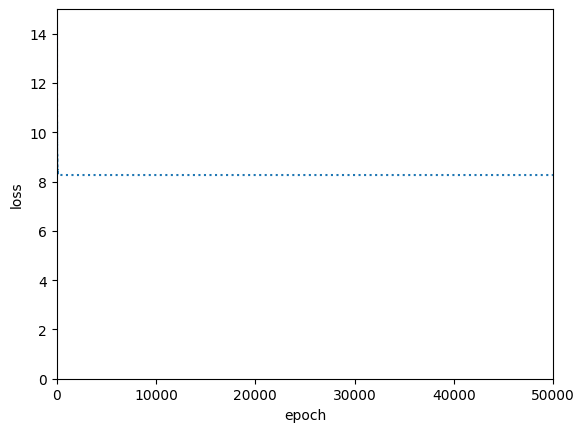

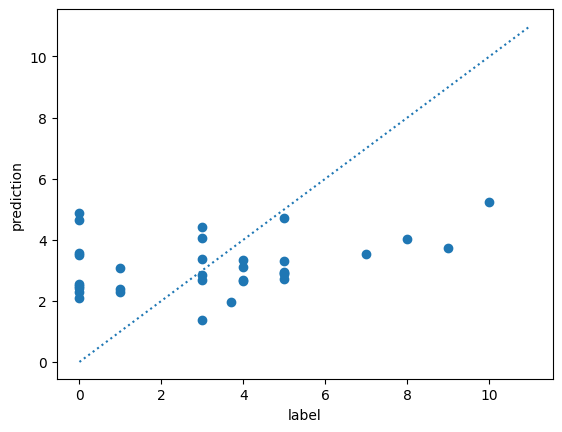

In [43]:
plt.plot(loss_valid_step,':')
plt.xlabel('step')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

plt.plot(loss_valid_epoch,':')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

In [51]:
#non Linear activation을 퐈함해 반복
num_epoch = 10000
lr = 0.00042
batch_size = len(X) 

# nonlinear activation 을 포함한 MLP 모델
model2 = nn.Sequential(
    nn.Linear(4,400), 
    nn.ReLU(), 
    nn.Linear(400,1)
)
loss = nn.MSELoss(reduction= 'mean')
alg = torch.optim.SGD(model2.parameters(), lr)

loss_valid_step = []
loss_valid_epoch = []

for i in np.arange(0, num_epoch):
  iter = data_iter(X, y, batch_size) 
  for batch_data, batch_label in iter:
    #forward
    y_hat = model2(batch_data)
    #los cal
    l = loss(y_hat, batch_label.reshape(y_hat.shape)) 
    l.backward() #gradient 계산
    #파라미터업데이트
    alg.step()
    alg.zero_grad()
    loss_valid_step.append(l.detach())
  
  y_vd_hat = model2(X_vd) 
  l_all = loss(y_vd_hat, y_vd.reshape(y_vd_hat.shape))
  loss_valid_epoch.append(l_all.detach())

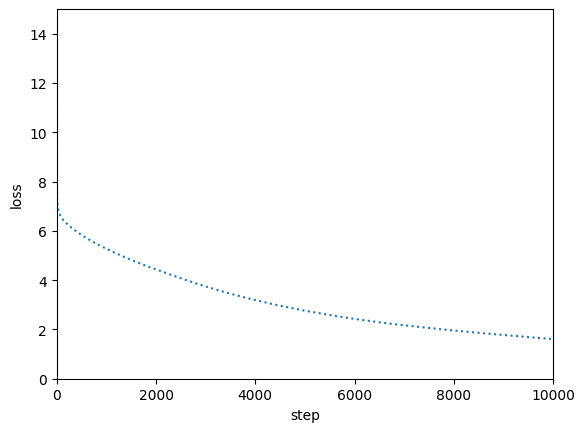

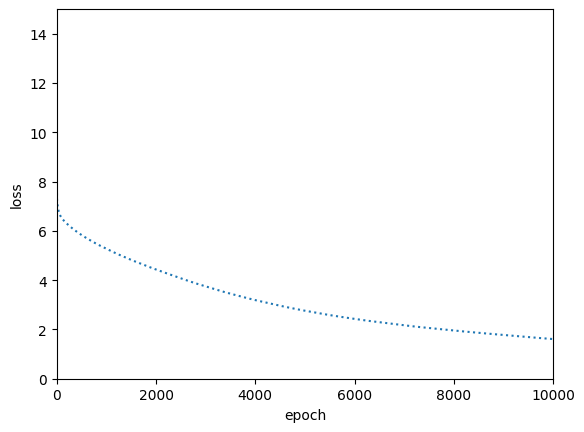

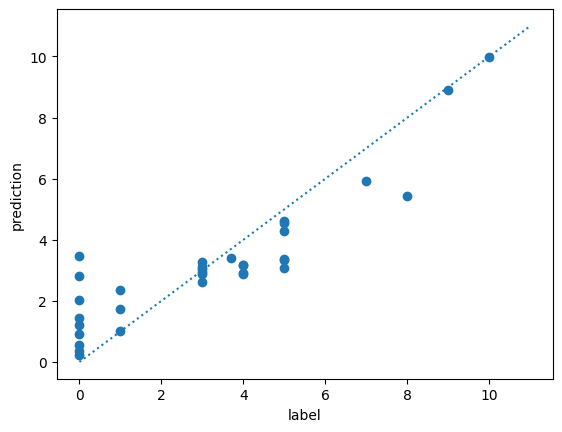

In [52]:
plt.plot(loss_valid_step,':')
plt.xlabel('step')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

plt.plot(loss_valid_epoch,':')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.axis([0,num_epoch,0,15])
plt.show()

plt.scatter(y,y_vd_hat.detach().numpy())
plt.plot(np.arange(0,12),np.arange(0,12),':')
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

#  Softmax, Cross Entropy Loss

In [53]:
import torch
import torch.nn as nn
import numpy as np
import glob
import random

from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio as audio
import IPython.display as ipd

In [ ]:
#Softmax는 MLP에서 y_hat 을 확률적으로 산출하기 위해 사용
#Cross entorypy loss에는 softmax 함수가 내장되어있다.